# Fundamentos Matematicos para Deep Learning

## Introduccion

Es muy importante entender los fundamentos matematicos del DL ya que eso te permitira construir, conocer, entender e implementar los algoritmos de DL. Parte de los fundamentos que se veran se basan en este capitulo de libro:  [linear algebra chapter from the Deep Learning Book](http://www.deeplearningbook.org/contents/linear_algebra.html) by Goodfellow et al.. 


In [0]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns



## Scalars, Vectors, Matrices and Tensors

Primero empezaremos por definir algunos conceptos:

![Difference between a scalar, a vector, a matrix and a tensor](https://hadrienj.github.io/assets/images/2.1/scalar-vector-matrix-tensor.png)
Difference between a scalar, a vector, a matrix and a tensor

- A scalar is a single number
- A vector is an array of numbers.

$$
{x} =\begin{bmatrix}
    x_1 \\\\
    x_2 \\\\
    \cdots \\\\
    x_n
\end{bmatrix}
$$

- A matrix is a 2-D array

$$
{A}=
\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\\\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
$$

- A tensor is a $n$-dimensional array with $n>2$

We will follow the conventions used in the [Deep Learning Book](http://www.deeplearningbook.org/):

- scalars are written in lowercase and italics. For instance: $n$
- vectors are written in lowercase, italics and bold type. For instance: ${x}$
- matrices are written in uppercase, italics and bold. For instance: ${X}$


In [5]:
# Vector de 1D
x = np.array([1, 2, 3, 4])
x

array([1, 2, 3, 4])

In [6]:
# Dimensiones del vector
x.shape

(4,)

In [18]:
# Matriz de 2D
A = np.array([[1, 2], 
              [3, 4], 
              [5, 6]])
print(A)
print("Dimensiones:  ")
print(A.shape)

[[1 2]
 [3 4]
 [5 6]]
Dimensiones:  
(3, 2)


##  Multiplying Matrices and Vectors

The standard way to multiply matrices is not to multiply each element of one with each elements of the other (this is the element-wise product) but to calculate the sum of the products between rows and columns. The matrix product, also called **dot product**, is calculated as following:

![alt text](https://hadrienj.github.io/assets/images/2.2/dot-product.png)

<em>The dot product between a matrix and a vector</em>

$$
C_{i,j} = A_{i,k}B_{k,j} = \sum_{k}A_{i,k}B_{k,j}
$$

The number of columns of the first matrix must be equal to the number of rows of the second matrix. Thus, if the dimensions, or the shape of the first matrix, is ($m \times n$) the second matrix need to be of shape ($n \times x$). The resulting matrix will have the shape ($m \times x$).

Matrix multiplication is :
* Distributive:   ${A}({B}+{C}) = {AB}+{AC}$
* Assosiative: $ ({A}{B})C = A({B}{C})$ 
* Not commutative ${AB} \neq {BA}$

In [7]:
A = np.array([[1, 2, 3], 
              [4, 5, 6], 
              [7, 8, 9], 
              [10, 11, 12]])

B = np.array([[2, 7], 
              [1, 2], 
              [3, 6]])

print("A shape: ",A.shape)
print("B shape: ",B.shape)

# Dot product
C= A @ B 

print("C shape: ", C.shape)


A shape:  (4, 3)
B shape:  (3, 2)
C shape:  (4, 2)


## System of linear equations

This is an important part of why linear algebra can be very useful to solve variety of problems. Here we will see that it can be use to represent system of equations.

A system of equations is a set of multiple equations (at least 1). For instance we could have:

$$
\begin{cases}
y = 2x + 1 \\\\
y = \frac{7}{2}x +3
\end{cases}
$$

A system of equations is defined by its number of equations and its number of unknowns. In our example above, the system has 2 equations and 2 unknowns ($x$ and $y$). In addition we call this a system of **linear** equations because each equations is linear. It is easy to see that in 2 dimensions: we will have one straight line per equation and the dimensions are the unknowns. Here is the plot of the first one:

![alt text](https://hadrienj.github.io/assets/images/2.2/plot-linear-equation.png)

## Using matrices to describe the system

Matrices can be used to describe a system of linear equations of the form ${Ax}={b}$. Here is such a system:

$$
A_{1,1}x_1 + A_{1,2}x_2 + A_{1,n}x_n = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2 + A_{2,n}x_n = b_2 \\\\
\cdots \\\\
A_{m,1}x_1 + A_{m,2}x_2 + A_{m,n}x_n = b_n
$$

The unknowns (what we want to find to solve the system) are the variables $x_1$ and $x_2$ corresponding to the previous variables $x$ and $y$. It is exactly the same form as with the last example but with all the variables on the same side. $y = 2x + 1$ becomes $-2x + y = 1$ with $x$ corresponding to $x_1$ and $y$ corresponding to $x_2$. We will have $n$ unknowns and $m$ equations.

The variables are named $x_1, x_2, \cdots, x_n$ by convention because we will see that it can be summarised in the vector ${x}$.

### Left hand side

The left hand term can considered as the product of a matrix ${A}$ containing weights for each variable ($n$ columns) and each equation ($m$ rows):

$$
{A}=
\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\\\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
$$

with a vector ${x}$ containing the $n$ unknowns

$$
{x}=
\begin{bmatrix}
    x_1 \\\\
    x_2 \\\\
    \cdots \\\\
    x_n
\end{bmatrix}
$$

The dot product of ${A}$ and ${x}$ gives a set of equations. Here is a simple example:

![alt text](https://hadrienj.github.io/assets/images/2.2/system-linear-equations-matrix-form.png)
<em>Matrix form of a system of linear equations</em>

We have a set of two equations with two unknowns. So the number of rows of ${A}$ gives the number of equations and the number of columns gives the number of unknowns.

### Both sides

The equation system can be wrote like that:

$$
\begin{bmatrix}
    A_{1,1} & A_{1,2} & \cdots & A_{1,n} \\\\
    A_{2,1} & A_{2,2} & \cdots & A_{2,n} \\\\
    \cdots & \cdots & \cdots & \cdots \\\\
    A_{m,1} & A_{m,2} & \cdots & A_{m,n}
\end{bmatrix}
\times
\begin{bmatrix}
    x_1 \\\\
    x_2 \\\\
    \cdots \\\\
    x_n
\end{bmatrix}
=
\begin{bmatrix}
    b_1 \\\\
    b_2 \\\\
    \cdots \\\\
    b_m
\end{bmatrix}
$$

Or simply:

$${Ax}={b}$$


## Identity matrices

The identity matrix ${I}_n$ is a special matrix of shape ($n \times n$) that is filled with $0$ except the diagonal that is filled with 1.


In [11]:
np.eye(3) 

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Inverse Matrices

The matrix inverse of ${A}$ is denoted ${A}^{-1}$. It is the matrix that results in the identity matrix when it is multiplied by ${A}$:

$${A}^{-1}{A}={I}_n$$

This means that if we apply a linear transformation to the space with ${A}$, it is possible to go back with ${A}^{-1}$. It provides a way to cancel the transformation.

### Example :

$$
{A}=\begin{bmatrix}
    3 & 0 & 2 \\\\
    2 & 0 & -2 \\\\
    0 & 1 & 1
\end{bmatrix}
$$

For this example, we will use the Numpy function `linalg.inv()` to calculate the inverse of ${A}$. Let's start by creating ${A}$:

In [12]:
A = np.array([[3, 0, 2], [2, 0, -2], [0, 1, 1]])
A

array([[ 3,  0,  2],
       [ 2,  0, -2],
       [ 0,  1,  1]])

In [13]:
A_inv = np.linalg.inv(A)
A_inv

array([[ 0.2,  0.2,  0. ],
       [-0.2,  0.3,  1. ],
       [ 0.2, -0.3, -0. ]])

In [15]:
np.set_printoptions(suppress=True) # avoid inaccurate floating values
A_bis = A_inv.dot(A)
A_bis

array([[ 1.,  0., -0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

## Sovling a system of linear equations


The inverse matrix can be used to solve the equation ${Ax}={b}$ by adding it to each term:

$${A}^{-1}{Ax}={A}^{-1}{b}$$

Since we know by definition that ${A}^{-1}{A}={I}$, we have:

$${I}_n{x}={A}^{-1}{b}$$

We saw that a vector is not changed when multiplied by the identity matrix. So we can write:

$${x}={A}^{-1}{b}$$

This is great! We can solve a set of linear equation just by computing the inverse of ${A}$ and apply this matrix to the vector of results ${b}$!

### Example :

We will take a simple solvable example:

$$
\begin{cases}
y = 2x \\\\
y = -x +3
\end{cases}
$$
:

$$
\begin{cases}
A_{1,1}x_1 + A_{1,2}x_2 = b_1 \\\\
A_{2,1}x_1 + A_{2,2}x_2= b_2
\end{cases}
$$

Here, $x_1$ corresponds to $x$ and $x_2$ corresponds to $y$. So we have:

$$
\begin{cases}
2x_1 - x_2 = 0 \\\\
x_1 + x_2= 3
\end{cases}
$$

Our matrix ${A}$ of weights is:

$$
{A}=
\begin{bmatrix}
    2 & -1 \\\\
    1 & 1
\end{bmatrix}
$$

And the vector ${b}$ containing the solutions of individual equations is:

$$
{b}=
\begin{bmatrix}
    0 \\\\
    3
\end{bmatrix}
$$

Under the matrix form, our systems becomes:

$$
\begin{bmatrix}
    2 & -1 \\\\
    1 & 1
\end{bmatrix}
\begin{bmatrix}
    x_1 \\\\
    x_2
\end{bmatrix}=
\begin{bmatrix}
    0 \\\\
    3
\end{bmatrix}
$$

Let's find the inverse of ${A}$:


In [16]:
A = np.array([[2, -1], 
              [1, 1]])
A

array([[ 2, -1],
       [ 1,  1]])

In [17]:
A_inv = np.linalg.inv(A)
A_inv

array([[ 0.33333333,  0.33333333],
       [-0.33333333,  0.66666667]])

In [0]:
b = np.array([[0], [3]])

Formula: 
$${x}={A}^{-1}{b}$$


In [19]:
x = A_inv.dot(b)
x

array([[1.],
       [2.]])

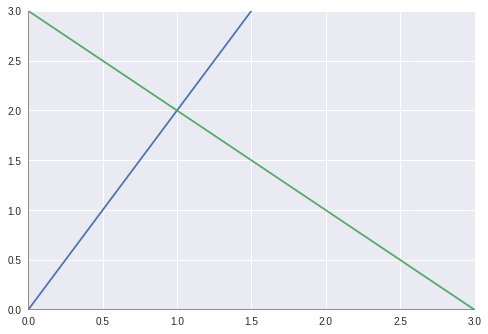

In [20]:
x = np.arange(-10, 10)
y = 2*x
y1 = -x + 3

plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(0, 3)
plt.ylim(0, 3)
# draw axes
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')
plt.show()

## Linear combination

Before going to the column figure, we need to talk about linear combination. The linear combination of 2 vectors corresponds to their weighted sum.

### Example 

Let's take two vectors

$$
\vec{u}=
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix}
$$

and

$$
\vec{v}=
\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix}
$$

These two vectors have 2 dimensions and thus contain coordinates in 2-D.


The linear combination of $\vec{u}$ and $\vec{v}$ is

$$
a\vec{u}+b\vec{v}= a
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix} + b\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix}
$$

with $a$ and $b$ the weights of the vectors.

Graphically, the vectors are added to reach a specific point in space. For example if $a=2$ and $b=1$:

$$
2\vec{u}+\vec{v}= 2
\begin{bmatrix}
    1 \\\\
    3
\end{bmatrix} +
\begin{bmatrix}
    2 \\\\
    1
\end{bmatrix} =
\begin{bmatrix}
    2 \cdot 1 + 2 \\\\
    2 \cdot 3 + 1
\end{bmatrix} =
\begin{bmatrix}
    4 \\\\
    7
\end{bmatrix}
$$

The sum of $\vec{u}$ and $\vec{v}$ is a vector that will reach the point of corrdinates $(4, 7)$. It takes a set of coordinates and an array of colors as input and plot the corresponding vectors. So let's plot $\vec{u}$ and $\vec{v}$:

In [0]:
def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha)

(0, 5)

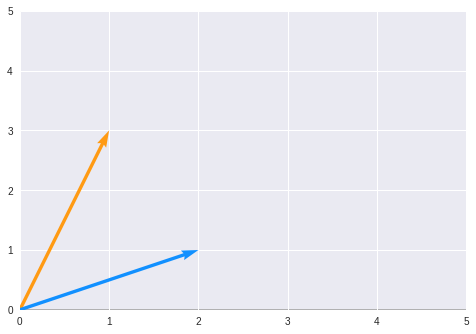

In [22]:
orange = '#FF9A13'
blue = '#1190FF'
plotVectors([[1, 3], [2, 1]], [orange, blue])
plt.xlim(0, 5)
plt.ylim(0, 5)

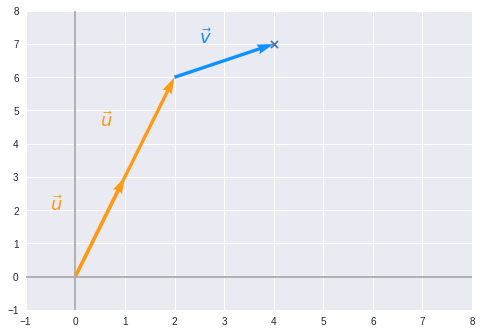

In [23]:
# Weigths of the vectors
a = 2
b = 1
# Start and end coordinates of the vectors
u = [0,0,1,3]
v = [2,6,2,1]

plt.quiver([u[0], a*u[0], b*v[0]],
           [u[1], a*u[1], b*v[1]],
           [u[2], a*u[2], b*v[2]],
           [u[3], a*u[3], b*v[3]],
           angles='xy', scale_units='xy', scale=1, color=[orange, orange, blue])
plt.xlim(-1, 8)
plt.ylim(-1, 8)
# Draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.scatter(4,7,marker='x',s=50)
# Draw the name of the vectors
plt.text(-0.5, 2, r'$\vec{u}$', color=orange, size=18)
plt.text(0.5, 4.5, r'$\vec{u}$', color=orange, size=18)
plt.text(2.5, 7, r'$\vec{v}$', color=blue, size=18)
plt.show()

### Example: 

$m=2$, $n=2$: 2 equations and 2 variables

$$
A_{1,1}x_1 + A_{1,2}x_2 = b_1\\\\
A_{2,1}x_1 + A_{2,2}x_2 = b_2
$$

$$
\begin{cases}
y = \frac{1}{2}x+1\\\\
y = -x + 4
\end{cases}
\Leftrightarrow
\begin{cases}
\frac{1}{2}x-y = -1\\\\
x+y=4
\end{cases}
$$

So here is the matrix ${A}$:

$$
{A}=
\begin{bmatrix}
    \frac{1}{2} & -1 \\\\
    1 & 1
\end{bmatrix}
$$

The column figure gives us:

$$
x
\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}
+
y
\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}
=
\begin{bmatrix}
    -1 \\\\
    4
\end{bmatrix}
$$

The goal is to find the value of the weights ($x$ and $y$) for which the linear combination of the vector

$$
\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}
$$

and

$$
\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}
$$

gives the vector 

$$
\begin{bmatrix}
    -1 \\\\
    4
\end{bmatrix}
$$

We will solve the system graphically by plotting the equations and looking for their intersection:

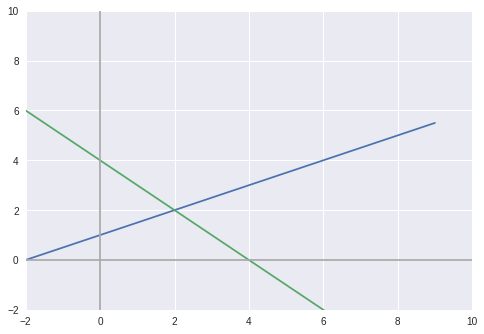

In [24]:
x = np.arange(-10, 10)
y = 0.5*x + 1

y1 = -x + 4


plt.figure()
plt.plot(x, y)
plt.plot(x, y1)
plt.xlim(-2, 10)
plt.ylim(-2, 10)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.show()


We can see that the solution (the intersection of the lines representing our two equations) is $x=2$ and $y=2$. This means that the linear combination is the following:

$$
2
\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}
+
2
\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}
=
\begin{bmatrix}
    -1 \\\\
    4
\end{bmatrix}
$$

Let's say that 

$$
\vec{u}=
\begin{bmatrix}
    \frac{1}{2} \\\\
    1
\end{bmatrix}
$$

and

$$
\vec{v}=
\begin{bmatrix}
    -1 \\\\
    1
\end{bmatrix}
$$

To talk in term of the column figure we can reach the point of coordinates $(-1, 4)$ if we add two times the vector $\vec{u}$ and two times the vector $\vec{v}$. Let's check that:

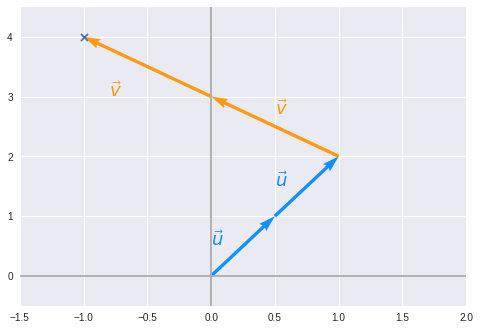

In [25]:
u = [0,0,0.5,1]
u_bis = [u[2],u[3],u[2],u[3]]
v = [2*u[2],2*u[3],-1,1]
v_bis = [2*u[2]-1,2*u[3]+1,v[2],v[3]]

plt.quiver([u[0], u_bis[0], v[0], v_bis[0]],
           [u[1], u_bis[1], v[1], v_bis[1]],
           [u[2], u_bis[2], v[2], v_bis[2]],
           [u[3], u_bis[3], v[3], v_bis[3]],
           angles='xy', scale_units='xy', scale=1, color=[blue, blue, orange, orange])
# plt.rc('text', usetex=True)
plt.xlim(-1.5, 2)
plt.ylim(-0.5, 4.5)
# draw axes
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')
plt.scatter(-1,4,marker='x',s=50)
plt.text(0, 0.5, r'$\vec{u}$', color=blue, size=18)
plt.text(0.5, 1.5, r'$\vec{u}$', color=blue, size=18)
plt.text(0.5, 2.7, r'$\vec{v}$', color=orange, size=18)
plt.text(-0.8, 3, r'$\vec{v}$', color=orange, size=18)
plt.show()

## Norms
We will see an important concept for machine learning and deep learning. The norm is what is generally used to evaluate the error of a model. For instance it is used to calculate the error between the output of a neural network and what is expected (the actual label or value). You can think of the norm as the length of a vector.

Norms are any functions that are characterized by the following properties:

1- Norms are non-negative values. If you think of the norms as a length, you easily see why it can't be negative.

2- Norms are $0$ if and only if the vector is a zero vector

3- Norms respect the triangle inequity. See bellow.

4-   The norm of a vector multiplied by a scalar is equal to the absolute value of this scalar multiplied by the norm of the vector.  $
\lVert{{k} \cdot {v}}\lVert  =  |{{k}}| \cdot \lVert{{v}}\lVert$

It is usually written with two horizontal bars: $\lVert{{x}}\lVert$

### The triangle inequity

The norm of the sum of some vectors is less than or equal the sum of the norms of these vectors.

$$
\lVert{u+v}\lVert  \leq  \lVert{{u}}\lVert+\lVert{{v}}\lVert
$$

### Example 

$$
{u}=
\begin{bmatrix}
    1 & 6
\end{bmatrix}
$$

and

$$
{v}=
\begin{bmatrix}
    4 & 2
\end{bmatrix}
$$

$$
\lVert{{u}+{v}}\lVert = \sqrt{(1+4)^2+(6+2)^2} = \sqrt{89} \approx 9.43
$$

$$
\lVert{{u}}\lVert+\lVert{{v}}\lVert = \sqrt{1^2+6^2}+\sqrt{4^2+2^2} = \sqrt{37}+\sqrt{20} \approx 10.55
$$

In [3]:
u = np.array([1, 6])
v = np.array([4, 2])
u+v

array([5, 8])

In [4]:
np.linalg.norm(u+v)

9.433981132056603

In [5]:
np.linalg.norm(u)+np.linalg.norm(v)

10.554898485297798

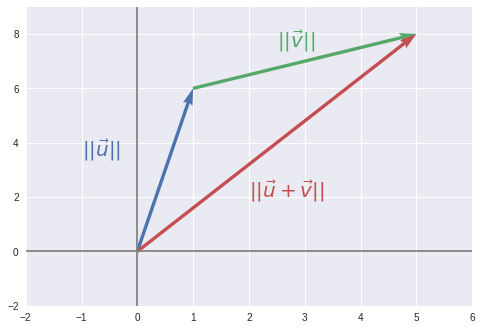

In [11]:
u = [0,0,1,6]
v = [0,0,4,2]
u_bis = [1,6,v[2],v[3]]
w = [0,0,5,8]
plt.quiver([u[0], u_bis[0], w[0]],
           [u[1], u_bis[1], w[1]],
           [u[2], u_bis[2], w[2]],
           [u[3], u_bis[3], w[3]],
           angles='xy', scale_units='xy', scale=1, color=sns.color_palette())
# plt.rc('text', usetex=True)
plt.xlim(-2, 6)
plt.ylim(-2, 9)
plt.axvline(x=0, color='grey')
plt.axhline(y=0, color='grey')

plt.text(-1, 3.5, r'$||\vec{u}||$', color=sns.color_palette()[0], size=20)
plt.text(2.5, 7.5, r'$||\vec{v}||$', color=sns.color_palette()[1], size=20)
plt.text(2, 2, r'$||\vec{u}+\vec{v}||$', color=sns.color_palette()[2], size=20)

plt.show()

### P-norms: general rules

Here is the recipe to get the $p$-norm of a vector:

1. Calculate the absolute value of each element
2. Take the power $p$ of these absolute values
3. Sum all these powered absolute values
4. Take the power $\frac{1}{p}$ of this result

This is more condensly expressed with the formula:

$$
\lVert{{x}}_p\lVert=(\sum_i|{x}_i|^p)^{1/p}
$$

This will be clear with examples using these widely used $p$-norms.

#### The $L^0$ norm

All positive values will get you a $1$ if you calculate its power $0$ except $0$ that will get you another $0$. Therefore this norm corresponds to the number of non-zero elements in the vector. It is not really a norm because if you multiply the vector by $\alpha$, this number is the same (rule 4 above).

#### The $L^1$ norm

$p=1$ so this norm is simply the sum of the absolute values:

$$
\lVert{{x}}_1\lVert=\sum_{i} |{x}_i|
$$
![](https://hadrienj.github.io/assets/images/2.5/l1-norm.png)

#### The Euclidean norm ($L^2$ norm)

The Euclidean norm is the $p$-norm with $p=2$. This may be the more used norm with the squared $L^2$ norm.

$$
\lVert{{x}}_2\lVert=(\sum_i {x}_i^2)^{1/2}\Leftrightarrow \sqrt{\sum_i {x}_i^2}
$$

![](https://hadrienj.github.io/assets/images/2.5/l2-norm.png)

#### The squared Euclidean norm (squared $L^2$ norm)

$$
\sum_i|{x}_i|^2
$$
![](https://hadrienj.github.io/assets/images/2.5/squared-L2-norm1.png)

The squared $L^2$ norm is convenient because it removes the square root and we end up with the simple sum of every squared values of the vector. 

The squared Euclidean norm is widely used in machine learning partly because it can be calculated with the vector operation ${x}^\text{T}{x}$.


## Eigendecomposition

We will start with getting some ideas on eigenvectors and eigenvalues. We will develop on the idea that a matrix can be seen as a linear transformation and that applying a matrix on its eigenvectors gives new vectors with the same direction. Then we will see how to express quadratic equations into the matrix form. We will see that the eigendecomposition of the matrix corresponding to a quadratic equation can be used to find the minimum and maximum of this function. As a bonus, we will also see how to visualize linear transformations in Python

The eigendecomposition is one form of matrix decomposition. Decomposing a matrix means that we want to find a product of matrices that is equal to the initial matrix. In the case of the eigendecomposition, we decompose the initial matrix into the product of its eigenvectors and eigenvalues. Before all, let’s see what are eigenvectors and eigenvalues.

### Matrices as linear transformations
You can think of matrices as linear transformations. Some matrices will rotate your space, others will rescale it etc. So when we apply a matrix to a vector, we end up with a transformed version of the vector. When we say that we ‘apply’ the matrix to the vector it means that we calculate the dot product of the matrix with the vector. We will start with a basic example of this kind of transformation.



In [0]:
A = np.array([[-1, 3], [2, -2]]) 
v = np.array([[2], [1]])

(-1, 4)

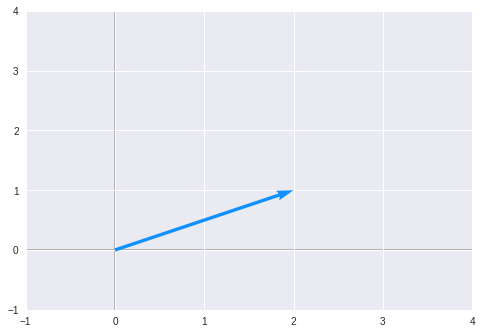

In [6]:
plotVectors([v.flatten()], cols=['#1190FF'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)

[[1]
 [2]]


(-1, 4)

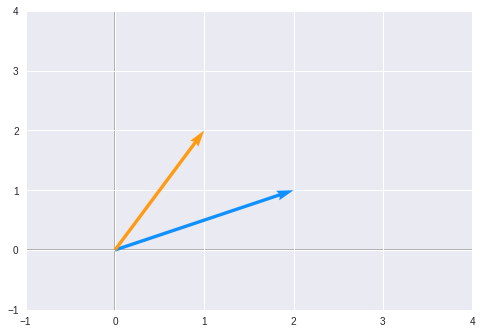

In [8]:
# Now, we will apply the matrix A to this vector and plot the old vector (light blue) and the new one (orange)
Av = A.dot(v)
print(Av)
plotVectors([v.flatten(), Av.flatten()], cols=['#1190FF', '#FF9A13'])
plt.ylim(-1, 4)
plt.xlim(-1, 4)